In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Order of Operations 
- Read csv(s)
- Removing unnessary headers from dataframe of WDI Data (df)
- Filter the dataframe (df) for relevant country names 
- Filer the dataframe (df) for relevant indicators

In [2]:
#to read csv of data
df= pd.read_csv('../WDIData.csv')

#to read csv of country names
df_country_names= pd.read_csv('WDI_Country_Code_and_Names.csv',encoding = "ISO-8859-1")

#to read csv of indicators
df_list_indicators = pd.read_csv('WDI_list_of_reviewed_indicators.csv')

### <font color = red> Dataframe Cleanup </font>

#### Removing Columns

In [3]:
#to grab the headers of the dataset
df_headers=list(df.columns.values)

In [4]:
# to count the number of headers
len(df_headers)

63

In [5]:
#only pull the headers that are years
df_years = df_headers[-59:]

In [6]:
#only select previous years before 2010
df_years_drop = df_years[0:50]
#to make column '2018' a list
df_years_drop_2018 = list([df_years[-1]])

# to combine lists of years into 1 drop line
df_drop = df_years_drop + df_years_drop_2018

In [7]:
#to drop the years and create a summarized df
df_columns_removed = df.drop(df_drop,axis=1)
df_columns_removed.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN


#### Filter by Country Names

In [8]:
#to preview df_country_names
df_country_names.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code
0,ABW,Aruba,Aruba,Aruba,AW
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF
2,AGO,Angola,Angola,People's Republic of Angola,AO
3,ALB,Albania,Albania,Republic of Albania,AL
4,AND,Andorra,Andorra,Principality of Andorra,AD


In [9]:
#make a list of country short name
country_short_names = list(df_country_names['Short Name'])

In [10]:
#filter df by short names list
df_filter_cols_nd_cols_rem = df_columns_removed.loc[df_columns_removed['Country Name'].isin(country_short_names)]

In [11]:
#source[filterdfbyalist]: https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

In [12]:
df_filter_cols_nd_cols_rem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
57564,Pacific island small states,PSS,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57565,Pacific island small states,PSS,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57566,Pacific island small states,PSS,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,25.958323,26.285890,26.535749,26.782890,27.085270,27.257535,27.474560,NaN
57567,Pacific island small states,PSS,Access to electricity (% of population),EG.ELC.ACCS.ZS,68.566481,70.510341,72.004083,72.806889,75.017881,79.515976,79.548083,NaN
57568,Pacific island small states,PSS,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,55.876132,58.485068,60.480956,61.882117,64.464801,71.707699,71.011807,NaN


#### Filter Data by Indicators

In [13]:
df_list_indicators.head()

,Indicator Name
0,Adjusted net national income (constant 2010 US$)
1,Adjusted net national income per capita (annua...
2,Adjusted net national income per capita (const...
3,Agricultural methane emissions (thousand metri...
4,Agricultural nitrous oxide emissions (thousand...


#### Per the word doc: 'World_Dev_Indicators_Reviewed_Subjects.docx'

Required & Optional indicators for chart preference:

- PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
- GDP (constant 2010 US$)
- GDP growth (annual %)
- Population, total
- Population growth (annual %)

In [14]:
req_nd_opti_indicators = df_list_indicators.loc[df_list_indicators['Indicator Name'].isin([
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
    'GDP (constant 2010 US$)',
    'GDP growth (annual %)',
    'Population, total',
    'Population growth (annual %)'
])]

req_nd_opti_indicators

,Indicator Name
11,GDP (constant 2010 US$)
12,GDP growth (annual %)
16,"PM2.5 air pollution, mean annual exposure (mic..."
18,Population growth (annual %)
19,"Population, total"


In [15]:
#to make a list of indicators for filter
list_indicators = list(req_nd_opti_indicators['Indicator Name'])
list_indicators 

['GDP (constant 2010 US$)',
 'GDP growth (annual %)',
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
 'Population growth (annual %)',
 'Population, total']

In [16]:
#filter by indicators
df_countries_indiciator = df_filter_cols_nd_cols_rem.loc[df_filter_cols_nd_cols_rem['Indicator Name'].isin(list_indicators )]
df_countries_indiciator.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
58077,Pacific island small states,PSS,GDP (constant 2010 US$),NY.GDP.MKTP.KD,6.416547e+09,6.679807e+09,6.797337e+09,6.983945e+09,7.259504e+09,7.496900e+09,7.663213e+09,7.916644e+09
58083,Pacific island small states,PSS,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.900471e+00,4.102837e+00,1.759472e+00,2.745316e+00,3.945613e+00,3.270127e+00,2.218436e+00,3.307099e+00
58624,Pacific island small states,PSS,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,1.384642e+01,1.403721e+01,1.306092e+01,1.244804e+01,1.200588e+01,1.199036e+01,1.129599e+01,1.125513e+01
58696,Pacific island small states,PSS,Population growth (annual %),SP.POP.GROW,1.339185e+00,1.294750e+00,1.272315e+00,1.265664e+00,1.278801e+00,1.266260e+00,1.268358e+00,1.236565e+00
58707,Pacific island small states,PSS,"Population, total",SP.POP.TOTL,2.214096e+06,2.242763e+06,2.271298e+06,2.300045e+06,2.329458e+06,2.358955e+06,2.388875e+06,2.418415e+06


#### <font color = purple> Final Dataframe Edit </font>

In [17]:
#remove unnessecary columns
df_final = df_countries_indiciator.drop(['Country Code','Indicator Code'],axis=1)
df_final.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
58077,Pacific island small states,GDP (constant 2010 US$),6.416547e+09,6.679807e+09,6.797337e+09,6.983945e+09,7.259504e+09,7.496900e+09,7.663213e+09,7.916644e+09
58083,Pacific island small states,GDP growth (annual %),2.900471e+00,4.102837e+00,1.759472e+00,2.745316e+00,3.945613e+00,3.270127e+00,2.218436e+00,3.307099e+00
58624,Pacific island small states,"PM2.5 air pollution, mean annual exposure (mic...",1.384642e+01,1.403721e+01,1.306092e+01,1.244804e+01,1.200588e+01,1.199036e+01,1.129599e+01,1.125513e+01
58696,Pacific island small states,Population growth (annual %),1.339185e+00,1.294750e+00,1.272315e+00,1.265664e+00,1.278801e+00,1.266260e+00,1.268358e+00,1.236565e+00
58707,Pacific island small states,"Population, total",2.214096e+06,2.242763e+06,2.271298e+06,2.300045e+06,2.329458e+06,2.358955e+06,2.388875e+06,2.418415e+06


### <font  color = blue >Dataframe for PM 2.5 </font>

In [18]:
#filter df by air pollution
air_pollu_df = df_final.loc[df_final["Indicator Name"]== 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].round(2)
air_pollu_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
58624,Pacific island small states,"PM2.5 air pollution, mean annual exposure (mic...",13.85,14.04,13.06,12.45,12.01,11.99,11.30,11.26
63421,Small states,"PM2.5 air pollution, mean annual exposure (mic...",29.20,29.45,29.89,29.69,28.72,31.24,29.87,30.25
76213,Afghanistan,"PM2.5 air pollution, mean annual exposure (mic...",65.25,66.84,66.02,61.37,59.01,61.25,56.29,56.91
77812,Albania,"PM2.5 air pollution, mean annual exposure (mic...",21.28,22.77,20.58,19.94,18.88,19.51,18.19,18.20
79411,Algeria,"PM2.5 air pollution, mean annual exposure (mic...",33.64,33.83,33.37,34.25,35.56,36.09,39.85,38.88


#### <font color = red> Reviewing Air Pollution data for 2009 </font>
I'm not including 2009 in the other data sets, becuase they have % annual growth. Meanwhile, air pollution doesn't have % growth. 

By adding 2009's data we can calculate % growth for 2010 in order to have complete data from 2010 - 2018.

In [19]:
#to get the column for 2009
#only select previous years before 2010
df_years_drop_air = df_years[0:49]
#to make column '2018' a list
df_years_drop_2018_air = list([df_years[-1]])

# to combine lists of years into 1 drop line
df_drop_air = df_years_drop_air + df_years_drop_2018_air 

In [20]:
#to drop the years and create a summarized df
df_columns_removed_air = df.drop(df_drop_air,axis=1)

#to remove extra columns, and to filter the data by country:
df_air = df_columns_removed_air.drop(['Country Code','Indicator Code'],axis=1).loc[df_columns_removed_air['Country Name'].isin(country_short_names)].loc[df_columns_removed_air['Indicator Name']== 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].set_index('Country Name').reset_index() 
df_air.head(3)

,Country Name,Indicator Name,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Pacific island small states,"PM2.5 air pollution, mean annual exposure (mic...",NaN,13.846417,14.037205,13.060916,12.448042,12.005876,11.990358,11.295988,11.255127
1,Small states,"PM2.5 air pollution, mean annual exposure (mic...",NaN,29.200931,29.451034,29.894694,29.687221,28.716533,31.238818,29.867332,30.245968
2,Afghanistan,"PM2.5 air pollution, mean annual exposure (mic...",NaN,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808


#### <font color=red> Conclusion of 2009 Air Pollution Data </font>

From the table above, we can see there is no data in 2009 for PM2.5 thus, when completing your charts use the years 2011 - 2017. 

Since we do not need air data for 2009 I'll discontinue dataframe "df_air" and use going forward "air_pollu_df".

In [21]:
#create a df for percent change of air pollution

air_pollu_df_1 = air_pollu_df.drop('Indicator Name', axis = 1).set_index('Country Name')
air_pollu_pct_change = air_pollu_df_1.pct_change(axis='columns')


In [22]:
#2010 won't have data bc there is no 2009 data, thus we will drop it
air_pollu_pct_change_1 = air_pollu_pct_change.drop('2010', axis = 1)

#drop all countries w.o values 
air_pollu_pct_change_2 = air_pollu_pct_change_1.dropna()

#create the % change df 
air_pollu_pct_change_3 = air_pollu_pct_change_2.multiply(100).round(2).reset_index()
air_pollu_pct_change_3.head()

#below are percentages

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Pacific island small states,1.37,-6.98,-4.67,-3.53,-0.17,-5.75,-0.35
1,Small states,0.86,1.49,-0.67,-3.27,8.77,-4.39,1.27
2,Afghanistan,2.44,-1.23,-7.04,-3.85,3.80,-8.10,1.10
3,Albania,7.00,-9.62,-3.11,-5.32,3.34,-6.77,0.05
4,Algeria,0.56,-1.36,2.64,3.82,1.49,10.42,-2.43


In [23]:
#to create a total column
air_pollu_pct_change_3['Total % Change'] = air_pollu_pct_change_3.iloc[:,1:].sum(axis = 1)
air_pollu_pct_change_3.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,Total % Change
0,Pacific island small states,1.37,-6.98,-4.67,-3.53,-0.17,-5.75,-0.35,-20.08
1,Small states,0.86,1.49,-0.67,-3.27,8.77,-4.39,1.27,4.06
2,Afghanistan,2.44,-1.23,-7.04,-3.85,3.80,-8.10,1.10,-12.88
3,Albania,7.00,-9.62,-3.11,-5.32,3.34,-6.77,0.05,-14.43
4,Algeria,0.56,-1.36,2.64,3.82,1.49,10.42,-2.43,15.14


### <font color= purple> Dataframe for GDP </font>

In [24]:
#filter df by GDP Constant
GDP_con_df = df_final.loc[df_final["Indicator Name"]== 'GDP (constant 2010 US$)']
GDP_con_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
58077,Pacific island small states,GDP (constant 2010 US$),6.416547e+09,6.679807e+09,6.797337e+09,6.983945e+09,7.259504e+09,7.496900e+09,7.663213e+09,7.916644e+09
62874,Small states,GDP (constant 2010 US$),3.943550e+11,4.201740e+11,4.339230e+11,4.456030e+11,4.571480e+11,4.687030e+11,4.769920e+11,4.858540e+11
75666,Afghanistan,GDP (constant 2010 US$),1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10
77265,Albania,GDP (constant 2010 US$),1.192696e+10,1.223109e+10,1.240478e+10,1.252882e+10,1.275058e+10,1.303365e+10,1.347027e+10,1.398693e+10
78864,Algeria,GDP (constant 2010 US$),1.612070e+11,1.658690e+11,1.714670e+11,1.762120e+11,1.828890e+11,1.897720e+11,1.960350e+11,1.991710e+11


In [25]:
#filter df by GDP % growth
GDP_per_growth_df = df_final.loc[df_final["Indicator Name"]== 'GDP growth (annual %)']
GDP_per_growth_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
58083,Pacific island small states,GDP growth (annual %),2.900471,4.102837,1.759472,2.745316,3.945613,3.270127,2.218436,3.307099
62880,Small states,GDP growth (annual %),7.134568,6.546939,3.272343,2.691602,2.590980,2.527518,1.768542,1.857869
75672,Afghanistan,GDP growth (annual %),14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292
77271,Albania,GDP growth (annual %),3.710000,2.550000,1.420000,1.000000,1.770000,2.220000,3.350000,3.835544
78870,Algeria,GDP growth (annual %),3.634145,2.891866,3.374769,2.767639,3.789121,3.763467,3.300000,1.600000


### <font color = orange> Dataframe for Population </font>

In [26]:
#filter df by GDP Constant
pop_total_df = df_final.loc[df_final["Indicator Name"]== 'Population, total']
pop_total_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
58707,Pacific island small states,"Population, total",2214096.0,2242763.0,2271298.0,2300045.0,2329458.0,2358955.0,2388875.0,2418415.0
63504,Small states,"Population, total",35465245.0,36171934.0,36875022.0,37572012.0,38266156.0,38960406.0,39646847.0,40330352.0
76296,Afghanistan,"Population, total",28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
77895,Albania,"Population, total",2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
79494,Algeria,"Population, total",36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0


In [27]:
pop_per_growth_df = df_final.loc[df_final["Indicator Name"]== 'Population growth (annual %)']
pop_per_growth_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
58696,Pacific island small states,Population growth (annual %),1.339185,1.294750,1.272315,1.265664,1.278801,1.266260,1.268358,1.236565
63493,Small states,Population growth (annual %),2.088254,1.992624,1.943739,1.890141,1.847503,1.814266,1.761894,1.723983
76285,Afghanistan,Population growth (annual %),2.812617,3.095119,3.272703,3.315224,3.183201,2.943234,2.689163,2.490790
77884,Albania,Population growth (annual %),-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972
79483,Algeria,Population growth (annual %),1.821358,1.924787,2.006614,2.036092,2.000666,1.919959,1.825463,1.738456


### <font color = Pink> Dataframe for CO2 Emission </font>

In [28]:
csv_path = "../Project_1_AirPollution_vs_GDPperCapita/Original CO2 emissions dataset.csv"
CO2data_df = pd.read_csv(csv_path, encoding = 'unicode_escape')
CO2data_df.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.41388,0.49080,0.68859,0.70674,0.83855,1.0069,1.0912,1.28190,1.2234,...,4.19830,6.76030,8.45220,12.22600,10.74210,10.00040,9.78920,10.10740,12.25790,13.01470
1,Albania,2.02250,2.27900,2.46220,2.08120,2.01520,2.1728,2.5501,2.67840,3.0704,...,4.37120,4.37480,4.59470,5.23590,4.90610,5.06000,5.71220,5.94770,6.27290,6.37920
2,Algeria,6.15120,6.05590,5.66100,5.41920,5.64300,6.5885,8.4209,8.43160,9.0502,...,109.03180,120.18590,117.81410,119.80690,128.11000,132.43460,143.17710,150.59250,150.37800,150.55140
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.53861,0.51662,0.51662,0.49098,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018
4,Angola,0.54895,0.45371,1.17910,1.14970,1.22290,1.1862,1.5525,0.99181,1.6695,...,25.48600,27.56550,28.86450,30.14210,33.18580,32.37310,34.45760,34.76110,35.35100,35.38990


In [29]:
CO2data_df_headers=list(CO2data_df.columns.values)
CO2data_df_years = CO2data_df_headers[-59:]
CO2data_df_years_drop = CO2data_df_years[1:51]
CO2data_df_1= CO2data_df.drop(CO2data_df_years_drop,axis=1)
CO2data_df_1.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,8.45220,12.22600,10.74210,10.00040,9.78920,10.10740,12.25790,13.01470
1,Albania,4.59470,5.23590,4.90610,5.06000,5.71220,5.94770,6.27290,6.37920
2,Algeria,117.81410,119.80690,128.11000,132.43460,143.17710,150.59250,150.37800,150.55140
3,Andorra,0.51662,0.49098,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018
4,Angola,28.86450,30.14210,33.18580,32.37310,34.45760,34.76110,35.35100,35.38990


In [30]:
CO2data_df_2 = CO2data_df_1.rename(index=str, columns={"Country": "Country Name"})
CO2data_df_2.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,8.45220,12.22600,10.74210,10.00040,9.78920,10.10740,12.25790,13.01470
1,Albania,4.59470,5.23590,4.90610,5.06000,5.71220,5.94770,6.27290,6.37920
2,Algeria,117.81410,119.80690,128.11000,132.43460,143.17710,150.59250,150.37800,150.55140
3,Andorra,0.51662,0.49098,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018
4,Angola,28.86450,30.14210,33.18580,32.37310,34.45760,34.76110,35.35100,35.38990


In [31]:
#indicator name not used
#CO2data_df_2['Indicator Name'] = "CO2 Emission"
#CO2data_df_2.head()

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,Indicator Name
0,Afghanistan,8.45220,12.22600,10.74210,10.00040,9.78920,10.10740,12.25790,13.01470,CO2 Emission
1,Albania,4.59470,5.23590,4.90610,5.06000,5.71220,5.94770,6.27290,6.37920,CO2 Emission
2,Algeria,117.81410,119.80690,128.11000,132.43460,143.17710,150.59250,150.37800,150.55140,CO2 Emission
3,Andorra,0.51662,0.49098,0.48731,0.47632,0.46166,0.47724,0.51151,0.52018,CO2 Emission
4,Angola,28.86450,30.14210,33.18580,32.37310,34.45760,34.76110,35.35100,35.38990,CO2 Emission


In [44]:
#CO2data_df_3 = CO2data_df_2.drop('Indicator Name', axis = 1).set_index('Country Name')
CO2_pct_change = CO2data_df_3.pct_change(axis='columns')
CO2_pct_change.head()

,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,
Afghanistan,NaN,0.446487,-0.121372,-0.069046,-0.021119,0.032505,0.212765,0.061740
Albania,NaN,0.139552,-0.062988,0.031369,0.128893,0.041228,0.054677,0.016946
Algeria,NaN,0.016915,0.069304,0.033757,0.081116,0.051792,-0.001424,0.001153
Andorra,NaN,-0.049630,-0.007475,-0.022552,-0.030778,0.033748,0.071809,0.016950
Angola,NaN,0.044262,0.100978,-0.024489,0.064390,0.008808,0.016970,0.001100


In [33]:
CO2_pct_change_1 = CO2_pct_change.drop('2010', axis = 1)

CO2_pct_change_2 = CO2_pct_change_1.dropna()

CO2_pct_change_3 = CO2_pct_change_2.multiply(100).round(2).reset_index()
CO2_pct_change_3.head()


,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,44.65,-12.14,-6.90,-2.11,3.25,21.28,6.17
1,Albania,13.96,-6.30,3.14,12.89,4.12,5.47,1.69
2,Algeria,1.69,6.93,3.38,8.11,5.18,-0.14,0.12
3,Andorra,-4.96,-0.75,-2.26,-3.08,3.37,7.18,1.69
4,Angola,4.43,10.10,-2.45,6.44,0.88,1.70,0.11


In [34]:
CO2_pct_change_3['Total % Change'] = CO2_pct_change_3.iloc[:,1:].sum(axis = 1)
CO2_pct_change_3.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,Total % Change
0,Afghanistan,44.65,-12.14,-6.90,-2.11,3.25,21.28,6.17,54.20
1,Albania,13.96,-6.30,3.14,12.89,4.12,5.47,1.69,34.97
2,Algeria,1.69,6.93,3.38,8.11,5.18,-0.14,0.12,25.27
3,Andorra,-4.96,-0.75,-2.26,-3.08,3.37,7.18,1.69,1.19
4,Angola,4.43,10.10,-2.45,6.44,0.88,1.70,0.11,21.21


In [35]:
CO2_growth_rate = CO2_pct_change_3.mean()

Creating 

### <font color= green> Dataframe for World Charts </font>

In [36]:
df_w = df_columns_removed.loc[df_columns_removed['Indicator Name'].isin(list_indicators )].drop(['Country Code','Indicator Code'],axis=1)
df_w.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
513,Arab World,GDP (constant 2010 US$),2.109930e+12,2.186500e+12,2.332090e+12,2.405940e+12,2.465050e+12,2.546490e+12,2.628980e+12,2.654930e+12
519,Arab World,GDP growth (annual %),4.772234e+00,3.629151e+00,6.658373e+00,3.166753e+00,2.456637e+00,3.303769e+00,3.239563e+00,9.871761e-01
1060,Arab World,"PM2.5 air pollution, mean annual exposure (mic...",5.395292e+01,5.278691e+01,5.341706e+01,5.415513e+01,5.266497e+01,6.047403e+01,5.882705e+01,5.872486e+01
1132,Arab World,Population growth (annual %),2.402393e+00,2.352527e+00,2.305073e+00,2.248844e+00,2.185197e+00,2.118210e+00,2.045601e+00,1.977892e+00
1143,Arab World,"Population, total",3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08


In [37]:
df_w_1 = df_w.loc[df_w['Country Name'] == 'World']
df_w_2 = df_w_1.drop('Country Name', axis= 1)
df_w_3 = df_w_2.rename(columns={'Indicator Name':'Years'})
df_w_4 = df_w_3.set_index("Years").T
df_w_4.head()

Years,GDP (constant 2010 US$),GDP growth (annual %),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Population growth (annual %),"Population, total"
2010,6.603640e+13,4.358058,50.175670,1.216530,6.932596e+09
2011,6.811750e+13,3.151521,50.693145,1.185645,7.014792e+09
2012,6.983510e+13,2.521433,47.475592,1.204879,7.099312e+09
2013,7.168790e+13,2.653189,47.887582,1.205040,7.184861e+09
2014,7.372540e+13,2.842105,45.893957,1.199693,7.271058e+09


In [38]:
world_data = df_w_4.rename(columns={
                           "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)":"PM2.5 Air Pollution (Mean Exposure)",
                           "Population, total":"Total Population"
                           })


world_data = world_data.apply(pd.to_numeric).round(2)
world_data

Years,GDP (constant 2010 US$),GDP growth (annual %),PM2.5 Air Pollution (Mean Exposure),Population growth (annual %),Total Population
2010,6.603640e+13,4.36,50.18,1.22,6.932596e+09
2011,6.811750e+13,3.15,50.69,1.19,7.014792e+09
2012,6.983510e+13,2.52,47.48,1.20,7.099312e+09
2013,7.168790e+13,2.65,47.89,1.21,7.184861e+09
2014,7.372540e+13,2.84,45.89,1.20,7.271058e+09
2015,7.583420e+13,2.86,47.18,1.19,7.357234e+09
2016,7.779680e+13,2.59,45.11,1.18,7.443811e+09
2017,8.025010e+13,3.15,45.48,1.15,7.529719e+09


In [39]:
world_data['PM2.5 Air Pollution(annual %)']=world_data['PM2.5 Air Pollution (Mean Exposure)'].pct_change()
world_data['PM2.5 Air Pollution(annual %)']=world_data['PM2.5 Air Pollution(annual %)']*100
world_data['CO2 Emission (annual %)']=CO2_growth_rate
world_data

Years,GDP (constant 2010 US$),GDP growth (annual %),PM2.5 Air Pollution (Mean Exposure),Population growth (annual %),Total Population,PM2.5 Air Pollution(annual %),CO2 Emission (annual %)
2010,6.603640e+13,4.36,50.18,1.22,6.932596e+09,NaN,NaN
2011,6.811750e+13,3.15,50.69,1.19,7.014792e+09,1.016341,3.373443
2012,6.983510e+13,2.52,47.48,1.20,7.099312e+09,-6.332610,2.911557
2013,7.168790e+13,2.65,47.89,1.21,7.184861e+09,0.863521,2.467406
2014,7.372540e+13,2.84,45.89,1.20,7.271058e+09,-4.176237,4.168208
2015,7.583420e+13,2.86,47.18,1.19,7.357234e+09,2.811070,3.437075
2016,7.779680e+13,2.59,45.11,1.18,7.443811e+09,-4.387452,2.653585
2017,8.025010e+13,3.15,45.48,1.15,7.529719e+09,0.820217,3.089057


In [40]:
#world_data.to_csv('Summarized .csv', sep=',' , encoding= 'utf-8', index=False)

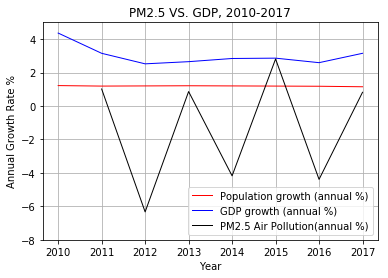

In [41]:
x_axis_GDP = world_data['GDP growth (annual %)']
x_axis_population = world_data['Population growth (annual %)']
x_axis_pm25=world_data['PM2.5 Air Pollution(annual %)']
plt.plot(x_axis_population, linewidth=1, color="red")
plt.plot(x_axis_GDP, linewidth=1, color="blue")
plt.plot(x_axis_pm25, linewidth=1, color="black")
plt.grid()
plt.title("PM2.5 VS. GDP, 2010-2017")
plt.xlabel("Year")
plt.ylabel("Annual Growth Rate %")

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.ylim(-8, 5)
plt.legend(loc="lower right")

plt.savefig("../Project_1_AirPollution_vs_GDPperCapita/PM25_vs_GDP.png")


#### Formating Values
The values need to be formated, however, it may be better to do that once the data can be classified as a series rather than a dataframe.

Thus we'll format in the final stage before graphing.

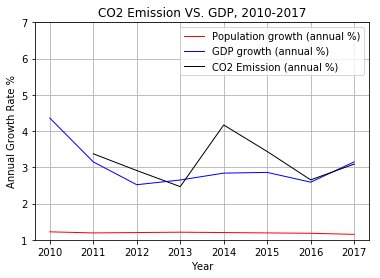

In [42]:
x_axis_GDP = world_data['GDP growth (annual %)']
x_axis_population = world_data['Population growth (annual %)']
x_axis_CO2=world_data['CO2 Emission (annual %)']
plt.plot(x_axis_population, linewidth=1, color="red")
plt.plot(x_axis_GDP, linewidth=1, color="blue")
plt.plot(x_axis_CO2, linewidth=1, color="black")
plt.grid()

plt.title("CO2 Emission VS. GDP, 2010-2017")
plt.xlabel("Year")
plt.ylabel("Annual Growth Rate %")

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
plt.ylim(1, 7)
plt.legend(loc="upper right")

plt.savefig("../Project_1_AirPollution_vs_GDPperCapita/CO2_vs_GDP.png")
